In [ ]:
### Tasks
# Find the following observation: -
# 1 - Most Bribes are paid in which cities?
# 2- Most Bribes are paid in which states?
# 3- Which department gets paid the most bribe?
# 4-Departments which take most bribe on average and overall.
# 5-Bribes paid by days of the month
# 6-Bribes paid by days of the days of week
# 7-Bribes paid by Years
# 8-Conclusion

In [4]:
# import the libraries
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(10,6)

In [5]:
df1=pd.read_csv('Bribe_report.csv')
df=df1.copy()

In [6]:
df.head()

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000


In [ ]:
# Data

In [7]:
df.info()
# we have 4 categorical variable and 2 numerical problems

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3473 non-null   object
 1   Date         3473 non-null   object
 2   Location     3473 non-null   object
 3   Department   3429 non-null   object
 4   Views        3473 non-null   int64 
 5   Amount(INR)  3473 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.9+ KB


In [8]:
r,c=df.shape
print('The dataset have',r,'rows','and',c,'columns')

The dataset have 3473 rows and 6 columns


In [9]:
# check for null values
df.isnull().sum()
# we can see that there are 44 null values in Department column

Title           0
Date            0
Location        0
Department     44
Views           0
Amount(INR)     0
dtype: int64

In [14]:
# checking the null records for departments
print(df[df['Department'].isnull()].shape)  # we can see that 44 are null
df[df['Department'].isnull()]

(44, 6)


,Title,Date,Location,Department,Views,Amount(INR)
34,I paid 500rs bribe for passport police verific...,2/10/2020,"NewDelhi,Delhi",NaN,1451,500
38,For clearing papers in survey for SRA,25-09-20,"Mumbai,Maharashtra",NaN,1760,500000
74,I paid 500rs bribe for passport police verific...,2/10/2020,"NewDelhi,Delhi",NaN,1451,500
78,For clearing papers in survey for SRA,25-09-20,"Mumbai,Maharashtra",NaN,1760,500000
144,Bribe taken by pollution office of Raipur (CG),15-05-20,"Raipur,Chhattisgarh",NaN,1565,200000
202,Reg Husband mohamed asik given amount to socia...,25-02-20,"Madurai,TamilNadu",NaN,1848,5000
230,For Staying on the road side with motorcycle,5/2/2020,"Bangalore,Karnataka",NaN,1816,200
260,Paid 500 Rs bribe at Nizamuddin Station Saraik...,10/1/2020,"NewDelhi,Delhi",NaN,1926,500
278,FSO demanded for bribe through his helper,31-12-19,"Silvassa,DadraandNagarHaveli",NaN,881,15000
300,Bribe for online motation,10/12/2019,"Gaya,Bihar",NaN,2138,30000


In [15]:
df['Department'].value_counts()
# we can see that 472 are null values

Others                                    472
Police Verification for Passport          266
Traffic Violations                        236
Birth Certificate                         155
Traffic Fines, Penalties, Rules           101
                                         ... 
Inspection of Vehicles after Accidents      1
License Renewal                             1
Title Deed                                  1
Extra Charges                               1
Enrolment for Aadhaar Card                  1
Name: Department, Length: 367, dtype: int64

In [17]:
#  So we will fill the missing valus with others
df['Department'].fillna('Others',inplace=True)
df.isnull().sum()

Title          0
Date           0
Location       0
Department     0
Views          0
Amount(INR)    0
dtype: int64

In [18]:
df.describe()

,Views,Amount(INR)
count,3473.000000,3.473000e+03
mean,3379.405701,3.331083e+04
std,1540.854884,1.508203e+05
min,463.000000,1.000000e+00
25%,2081.000000,3.300000e+02
50%,3272.000000,1.200000e+03
75%,4522.000000,8.000000e+03
max,20450.000000,2.185000e+06


In [19]:
# we want to see the stat for all columns
df.describe(include='all')

,Title,Date,Location,Department,Views,Amount(INR)
count,3473,3473,3473,3473,3473.000000,3.473000e+03
unique,3282,1334,510,367,NaN,NaN
top,Passport verification,7/11/2015,"Bangalore,Karnataka",Others,NaN,NaN
freq,10,37,769,516,NaN,NaN
mean,NaN,NaN,NaN,NaN,3379.405701,3.331083e+04
std,NaN,NaN,NaN,NaN,1540.854884,1.508203e+05
min,NaN,NaN,NaN,NaN,463.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,2081.000000,3.300000e+02
50%,NaN,NaN,NaN,NaN,3272.000000,1.200000e+03
75%,NaN,NaN,NaN,NaN,4522.000000,8.000000e+03


In [22]:
df['Department'].describe()

count       3473
unique       367
top       Others
freq         516
Name: Department, dtype: object

<AxesSubplot: xlabel='Amount(INR)', ylabel='Count'>

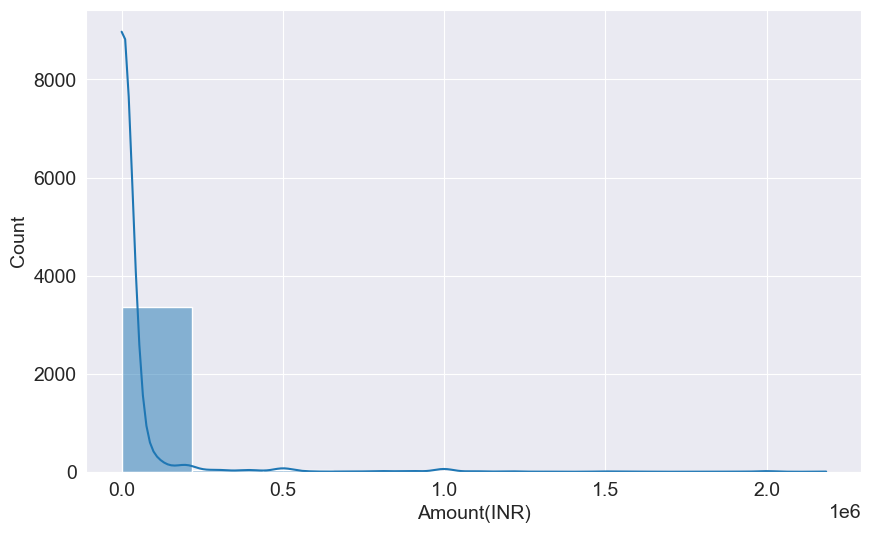

In [25]:
#plot a histogram for bribr amount
sns.histplot(df['Amount(INR)'],kde=True,bins=10)

<AxesSubplot: xlabel='Amount(INR)'>

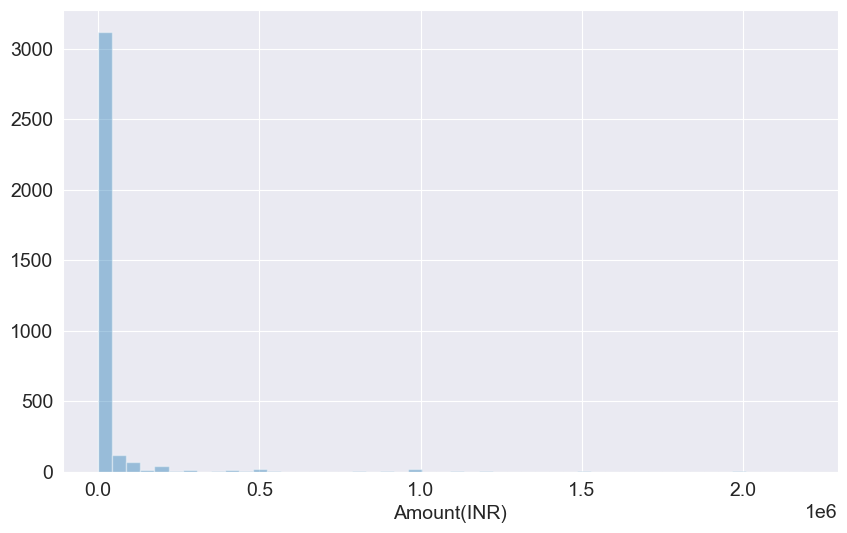

In [30]:
sns.distplot(df['Amount(INR)'],kde=False)

<AxesSubplot: xlabel='Amount(INR)', ylabel='Density'>

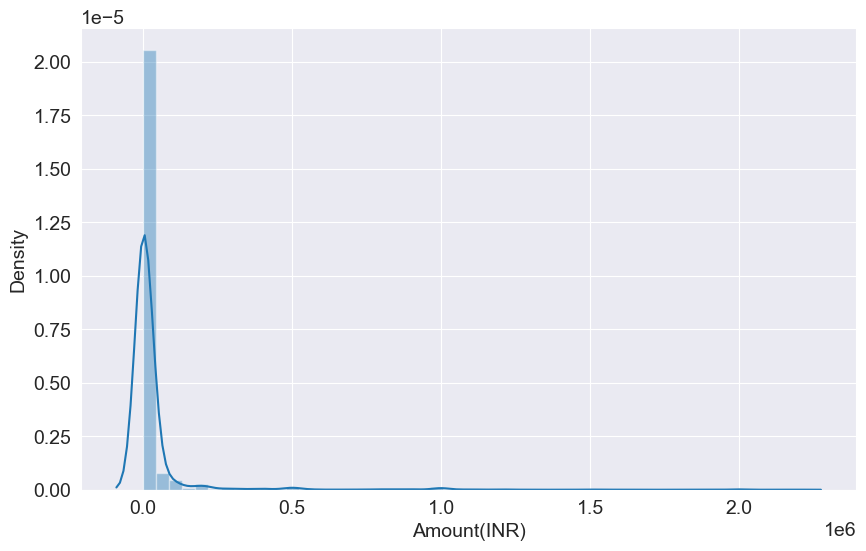

In [31]:
sns.distplot(df['Amount(INR)'],kde=True)

<AxesSubplot: xlabel='Amount(INR)', ylabel='Proportion'>

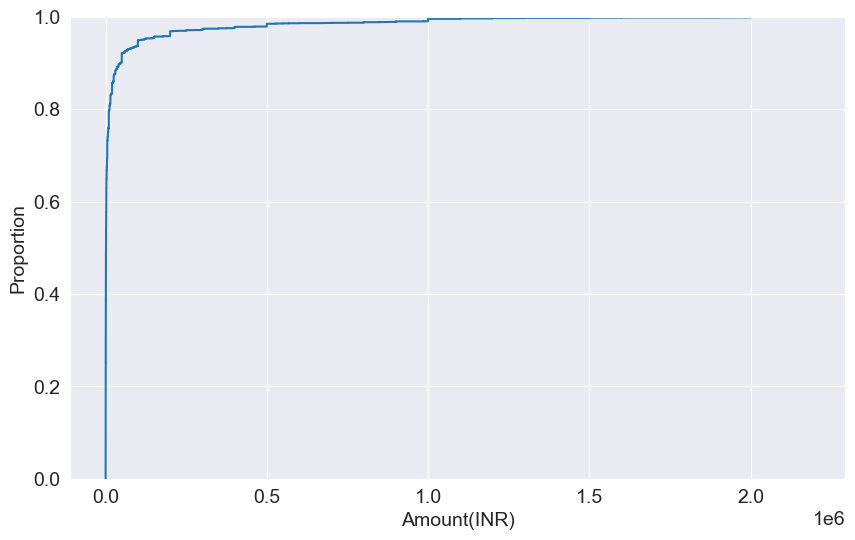

In [34]:
# ecdf plot sns-- empirical cumulative distribution function
sns.ecdfplot(df['Amount(INR)'])

<AxesSubplot: >

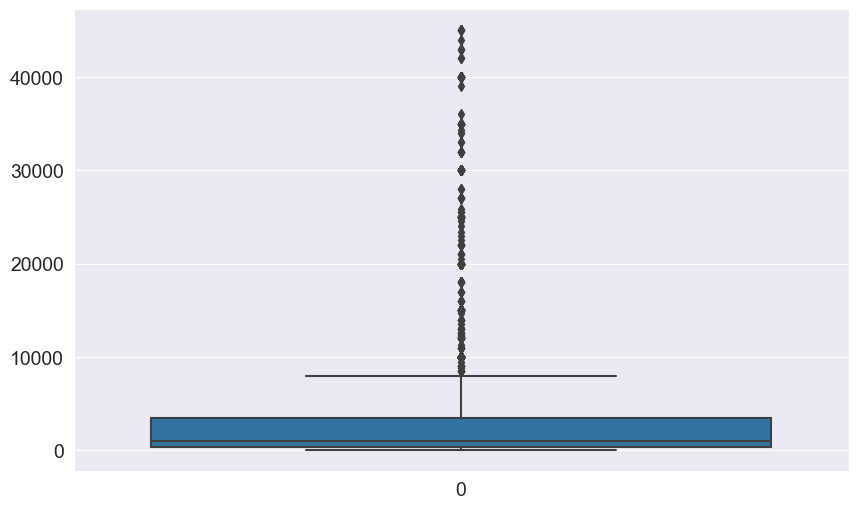

In [41]:
sns.boxplot(df['Amount(INR)'])

In [35]:
df['Amount(INR)'].min()

1

In [36]:
df['Amount(INR)'].max()

2185000

In [37]:
df['Amount(INR)'].quantile(.9)

45363.200000000084

In [38]:
df=df[df['Amount(INR)']<df['Amount(INR)'].quantile(.9)]
df.shape

(3125, 6)

In [39]:
df.head()

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000


In [40]:
df.shape

(3125, 6)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 0 to 3472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3125 non-null   object
 1   Date         3125 non-null   object
 2   Location     3125 non-null   object
 3   Department   3125 non-null   object
 4   Views        3125 non-null   int64 
 5   Amount(INR)  3125 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 235.4+ KB


In [44]:
# finding the departments
df['Department'].unique()

array(['Births, Family and Care', 'Vehicle Insurance',
       'Driving and Transport Business', 'Driving Licenses and Tests',
       'FIR and Complaints', 'Policies and Procedures', 'Others',
       'Police Clearance Certificate', 'Registrations and Licenses',
       'Building and Housing', 'Traffic Fines, Penalties, Rules',
       'Excise', 'Property Registration', 'Loan Sanctioning',
       'Court Related', 'Verification and Certificates', 'Drugs License',
       'Visa', 'Khata', 'College Leaving Certificate', 'Tax and Permits',
       'Autorickshaws', 'Certificates', 'Caste Certificate',
       'Dates for Hearing', 'Aadhaar Card Process', 'Excess Baggage',
       'Traffic Violations', 'Bill Payment', 'Water Connection',
       'Passport Status and Delivery', 'Land Registration',
       'Government Personnel', 'Government Schemes', 'Loans',
       'Marriage Certificate and Registration', 'Police Harassment',
       'Background Verification', 'Services',
       'Change of Tariff in Do

In [45]:
# split with city and prvoince from loacation feature
df[['City','Province']]=df['Location'].str.split(",",expand=True)
df.head()

,Title,Date,Location,Department,Views,Amount(INR),City,Province
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400,Bangalore,Karnataka
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350,Bangalore,Karnataka
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100,Bangalore,Karnataka
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,Bangalore,Karnataka
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000,Siwan,Bihar


In [47]:
df['City'].value_counts()

Bangalore                  720
NewDelhi                   210
Chennai                    142
Pune                       117
Mumbai                     101
                          ... 
Mirzapur                     1
Chhapra                      1
SantRavidasNagarBhadohi      1
Shamli                       1
Kozhikode                    1
Name: City, Length: 483, dtype: int64

In [52]:
#Q1- MOst bibes are from whcih city
most_bribe_city=df.groupby('City',)["Amount(INR)"].agg(["count",'sum'])
most_bribe_city.sort_values(by='count',ascending=False,inplace=True)
most_bribe_city.head()
# Bangalore is the most bribed city

,count,sum
City,,
Bangalore,720,3659321
NewDelhi,210,626320
Chennai,142,664328
Pune,117,299812
Mumbai,101,512496


In [53]:
most_bribe_city.reset_index(inplace=True)
most_bribe_city.head()

,City,count,sum
0,Bangalore,720,3659321
1,NewDelhi,210,626320
2,Chennai,142,664328
3,Pune,117,299812
4,Mumbai,101,512496


<AxesSubplot: xlabel='City', ylabel='count'>

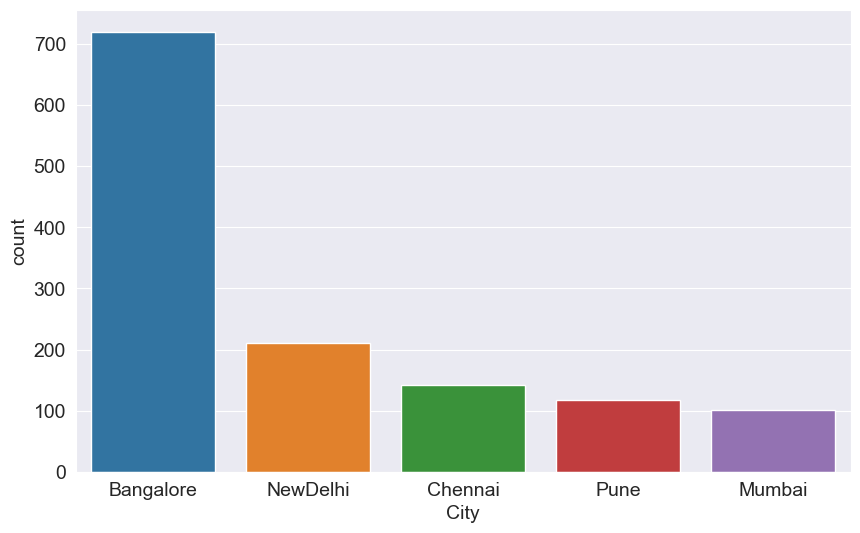

In [62]:
sns.barplot(x=most_bribe_city.head().City,y=most_bribe_city.head()['count'])

In [63]:
df.head(2)

,Title,Date,Location,Department,Views,Amount(INR),City,Province
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400,Bangalore,Karnataka
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350,Bangalore,Karnataka


In [64]:
#Q2- Which state has the highest bribe
most_bribe_state=df.groupby('Province',)["Amount(INR)"].agg(["count",'sum'])
most_bribe_state.sort_values(by='count',ascending=False,inplace=True)
most_bribe_state.head()

,count,sum
Province,,
Karnataka,838,4124357
UttarPradesh,357,1170341
Maharashtra,350,1454076
TamilNadu,299,1335778
Delhi,210,626320


In [65]:
most_bribe_state.reset_index(inplace=True)

In [66]:
most_bribe_state.head()

,Province,count,sum
0,Karnataka,838,4124357
1,UttarPradesh,357,1170341
2,Maharashtra,350,1454076
3,TamilNadu,299,1335778
4,Delhi,210,626320


<AxesSubplot: xlabel='Province', ylabel='count'>

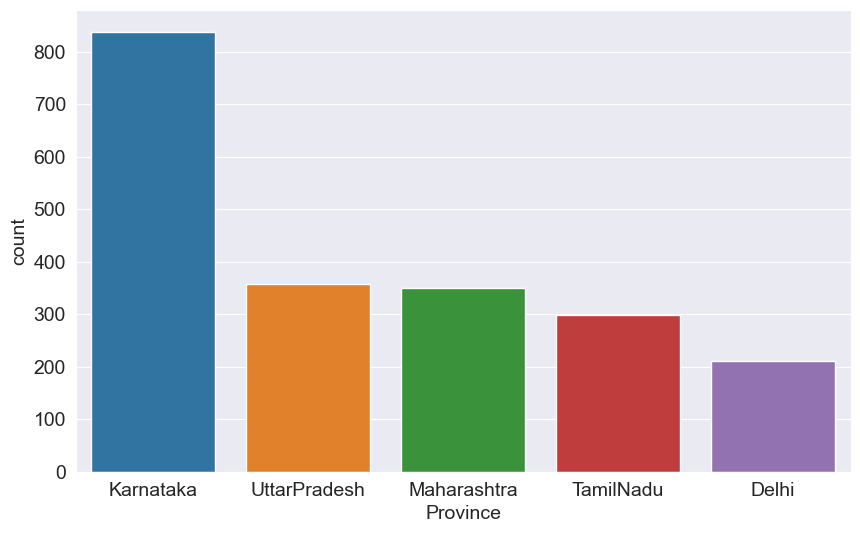

In [67]:
sns.barplot(x=most_bribe_state.head().Province,y=most_bribe_state.head()['count'])

In [77]:
#  3- Which department gets paid the most bribe?
most_bribe_dept=df.groupby(['Department'])["Amount(INR)"].agg(["count",'sum']).sort_values(by='count',ascending=False)
most_bribe_dept.head()

,count,sum
Department,,
Others,477,1787443
Police Verification for Passport,264,242827
Traffic Violations,236,189459
Birth Certificate,144,232212
"Traffic Fines, Penalties, Rules",101,141369


<AxesSubplot: xlabel='count', ylabel='Department'>

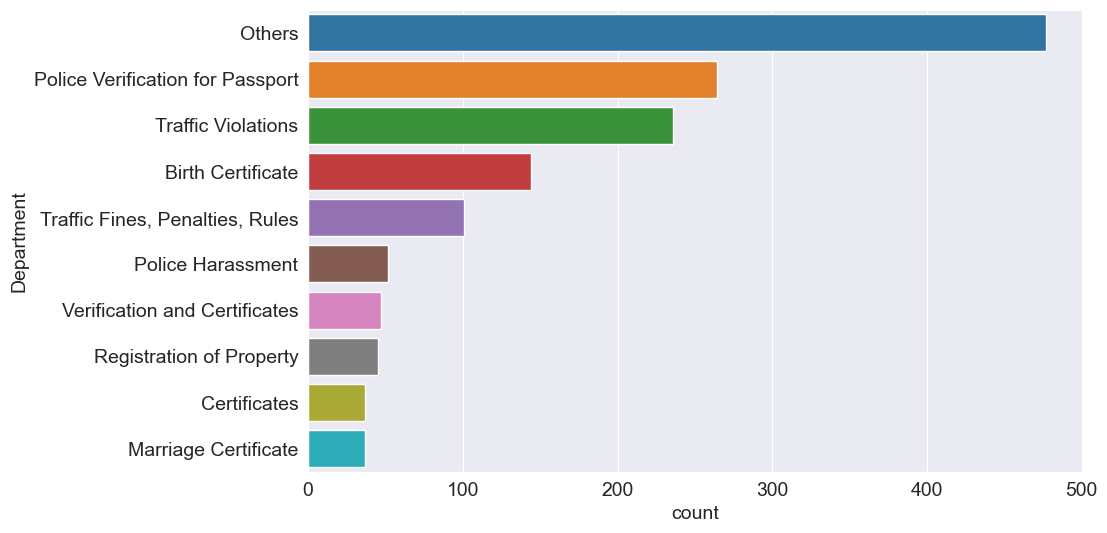

In [84]:
sns.barplot(y=most_bribe_dept.head(10).index,x=most_bribe_dept.head(10)['count'])

In [86]:
## 4-Departments which take most bribe on average and overall.
most_bribe_dept_sum=df.groupby(['Department'])["Amount(INR)"].agg(["count",'sum','mean']).sort_values(by='sum',ascending=False).head(10)
most_bribe_dept_mean=df.groupby(['Department'])["Amount(INR)"].agg(["count",'sum','mean']).sort_values(by='mean',ascending=False).head(10)
most_bribe_dept_mean

,count,sum,mean
Department,,,
Income Tax,1,40000,40000.0
Filing Tax Returns,1,40000,40000.0
Migration Certificate,1,40000,40000.0
Drugs License,2,80000,40000.0
Service Tax Return,1,32000,32000.0
Land Related,1,32000,32000.0
Medical Professional,1,30000,30000.0
Housing Plan Approval,2,60000,30000.0
Building Plan Approval,5,140000,28000.0


<AxesSubplot: xlabel='sum', ylabel='Department'>

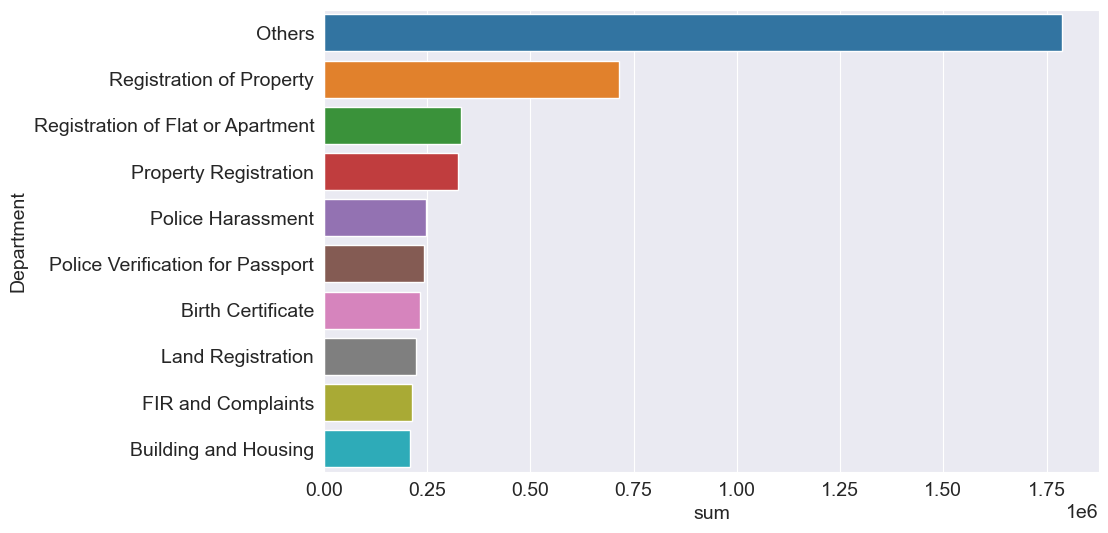

In [90]:
sns.barplot(y=most_bribe_dept_sum.index,x=most_bribe_dept_sum['sum'])

<AxesSubplot: xlabel='mean', ylabel='Department'>

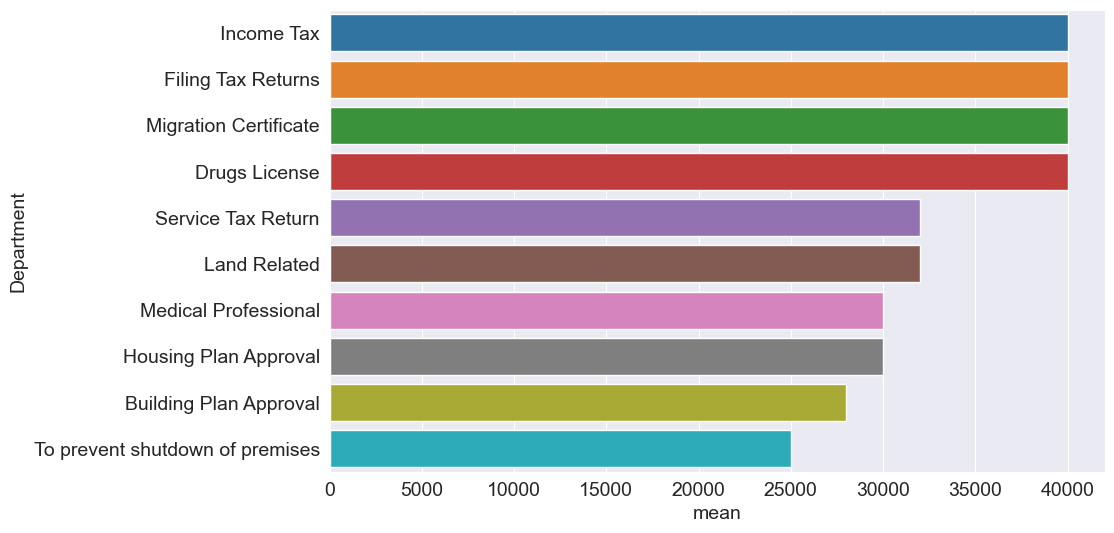

In [91]:
sns.barplot(y=most_bribe_dept_mean.index,x=most_bribe_dept_mean['mean'])

In [ ]:
# 5-Bribes paid by days of the month
# 6-Bribes paid by days of the days of week
# 7-Bribes paid by Years

In [94]:
df.info()
# we can see that the data column is object type but we need to convert to date
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        3125 non-null   object        
 1   Date         3125 non-null   datetime64[ns]
 2   Location     3125 non-null   object        
 3   Department   3125 non-null   object        
 4   Views        3125 non-null   int64         
 5   Amount(INR)  3125 non-null   int64         
 6   City         3125 non-null   object        
 7   Province     3125 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 284.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 0 to 3472
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        3125 non-null   object        
 1   Date         3125 non-null   datetime64[ns]
 2   Location     3125 non-null

In [97]:
df_day=df[['Date',"Amount(INR)"]]
df_day.head()

,Date,Amount(INR)
0,2020-10-14,400
1,2020-10-13,350
2,2020-10-13,100
3,2020-10-13,100
4,2020-10-13,15000


In [99]:
# extract the information for date
import datetime as dt

"""
dt.day_name()
dt.week
dt.year
dt.month
dt.dayofweek

"""

'\ndt.day_name()\ndt.week\ndt.year\ndt.month\ndt.dayofweek\n\n'

In [100]:
df_day["Day"]=df_day["Date"].dt.day
df_day["DayOfWeek"]=df_day["Date"].dt.dayofweek
df_day["Month"]=df_day["Date"].dt.month
df_day["Year"]=df_day["Date"].dt.year
df_day.head()

,Date,Amount(INR),Day,DayOfWeek,Month,Year
0,2020-10-14,400,14,2,10,2020
1,2020-10-13,350,13,1,10,2020
2,2020-10-13,100,13,1,10,2020
3,2020-10-13,100,13,1,10,2020
4,2020-10-13,15000,13,1,10,2020


In [105]:
most_bribe_day=df_day.groupby(['Day'])["Amount(INR)"].agg(["count",'sum'])
most_bribe_dayofweek=df_day.groupby(['DayOfWeek'])["Amount(INR)"].agg(["count",'sum'])
most_bribe_year=df_day.groupby(['Year'])["Amount(INR)"].agg(["count",'sum'])


In [106]:
most_bribe_day

,count,sum
Day,,
1,107,397106
2,86,338911
3,114,468748
4,94,440724
5,80,270402
6,87,332049
7,92,458437
8,98,406199
9,91,536490


In [107]:
most_bribe_dayofweek

,count,sum
DayOfWeek,,
0,439,1871951
1,520,2125361
2,513,1981031
3,423,1715406
4,425,1947879
5,498,1900388
6,307,1267496


In [108]:
most_bribe_year

,count,sum
Year,,
2015,255,818983
2016,870,3197636
2017,505,2034136
2018,454,2188335
2019,805,3435002
2020,236,1135420


<AxesSubplot: xlabel='Day', ylabel='sum'>

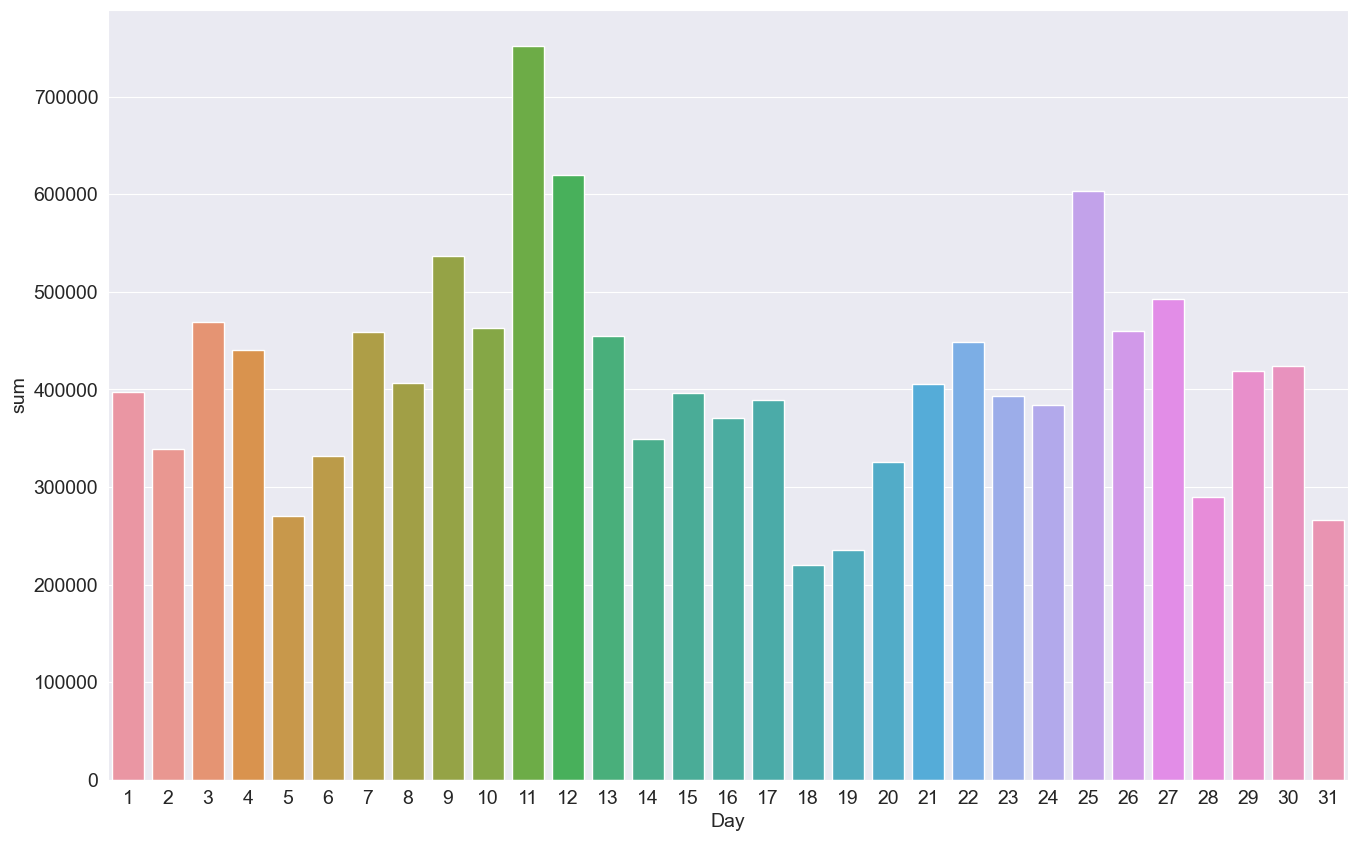

In [111]:
plt.figure(figsize=(16,10))
sns.barplot(x=most_bribe_day.index,y=most_bribe_day['sum'])

<AxesSubplot: xlabel='Year', ylabel='sum'>

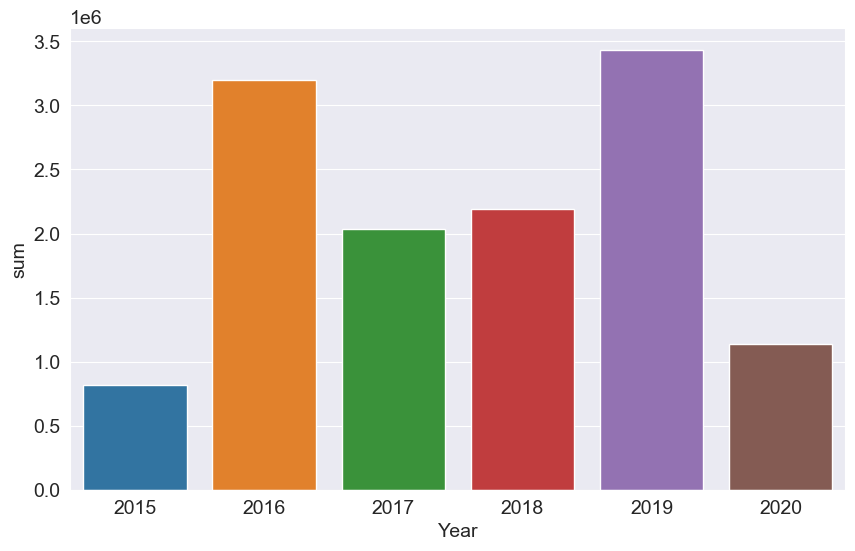

In [114]:
sns.barplot(x=most_bribe_year.index,y=most_bribe_year['sum'])

<AxesSubplot: xlabel='DayOfWeek', ylabel='sum'>

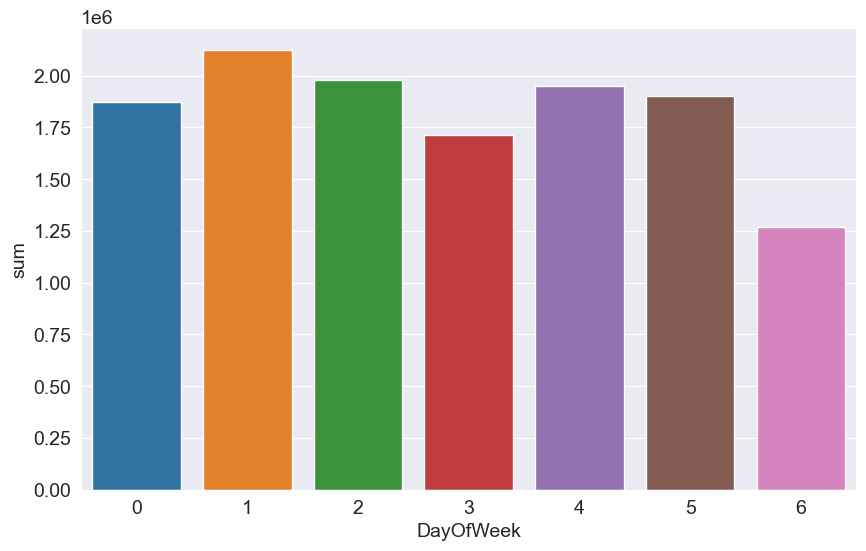

In [115]:
sns.barplot(x=most_bribe_dayofweek.index,y=most_bribe_dayofweek['sum'])